In [1]:
import os

REPO_NAME = "hubbard-transformer"
while not os.getcwd().endswith(REPO_NAME):
    os.chdir("..")

os.getcwd()

'/Users/spandan/Projects/condensed/hubbard-transformer'

In [2]:
from testing.test_hamiltonian import (
    expand_str_chains,
    spin_occupation_site_basis,
    display_heatmap,
)
from model.hamiltonian import HubbardHamiltonian

In [3]:
h = HubbardHamiltonian(t=1.0, U=2.0)

Generate basis states from binary numbers:

In [4]:
str1 = spin_occupation_site_basis(3, 2)
str1

['000000',
 '000001',
 '000010',
 '000011',
 '000100',
 '000101',
 '000110',
 '000111',
 '001000',
 '001001',
 '001010',
 '001011',
 '001100',
 '001101',
 '001110',
 '001111',
 '010000',
 '010001',
 '010010',
 '010011',
 '010100',
 '010101',
 '010110',
 '010111',
 '011000',
 '011001',
 '011010',
 '011011',
 '011100',
 '011101',
 '011110',
 '011111',
 '100000',
 '100001',
 '100010',
 '100011',
 '100100',
 '100101',
 '100110',
 '100111',
 '101000',
 '101001',
 '101010',
 '101011',
 '101100',
 '101101',
 '101110',
 '101111',
 '110000',
 '110001',
 '110010',
 '110011',
 '110100',
 '110101',
 '110110',
 '110111',
 '111000',
 '111001',
 '111010',
 '111011',
 '111100',
 '111101',
 '111110',
 '111111']

In [5]:
import itertools as it


def filter_particle_num(chains: list, particle_num: int):
    """
    Filters a list of chains based on the number of particles.
    """

    def count_particles(chain):
        return sum(1 for site in chain if site == "1")

    return [chain for chain in chains if count_particles(chain) == particle_num]

In [6]:
str1 = filter_particle_num(str1, 4)
str1

['001111',
 '010111',
 '011011',
 '011101',
 '011110',
 '100111',
 '101011',
 '101101',
 '101110',
 '110011',
 '110101',
 '110110',
 '111001',
 '111010',
 '111100']

Expand into tokens that the model takes:

In [7]:
a = expand_str_chains(str1)
b = a.clone()
a

tensor([[[[1, 1],
          [0, 0]],

         [[1, 0],
          [0, 1]],

         [[1, 0],
          [0, 1]],

         [[1, 0],
          [0, 1]],

         [[1, 0],
          [0, 1]],

         [[0, 1],
          [1, 0]],

         [[0, 1],
          [1, 0]],

         [[0, 1],
          [1, 0]],

         [[0, 1],
          [1, 0]],

         [[0, 0],
          [1, 1]],

         [[0, 0],
          [1, 1]],

         [[0, 0],
          [1, 1]],

         [[0, 0],
          [1, 1]],

         [[0, 0],
          [1, 1]],

         [[0, 0],
          [1, 1]]],


        [[[0, 0],
          [1, 1]],

         [[1, 0],
          [0, 1]],

         [[0, 1],
          [1, 0]],

         [[0, 0],
          [1, 1]],

         [[0, 0],
          [1, 1]],

         [[1, 0],
          [0, 1]],

         [[0, 1],
          [1, 0]],

         [[0, 0],
          [1, 1]],

         [[0, 0],
          [1, 1]],

         [[1, 1],
          [0, 0]],

         [[1, 0],
          [0, 1]],

         [

Calculate a Hamiltonian:

In [8]:
h_a_b = h.entry(a, b)
h_a_b

tensor([[ 4.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.],
        [ 0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.],
        [ 1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.],
        [ 0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.],
        [ 0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.],
        [-1.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0., -1.,  0.,  0.,  0.,  0.,
          0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,
          0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,
          0.],
        [ 0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  1., -1.,  0.,
          0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  

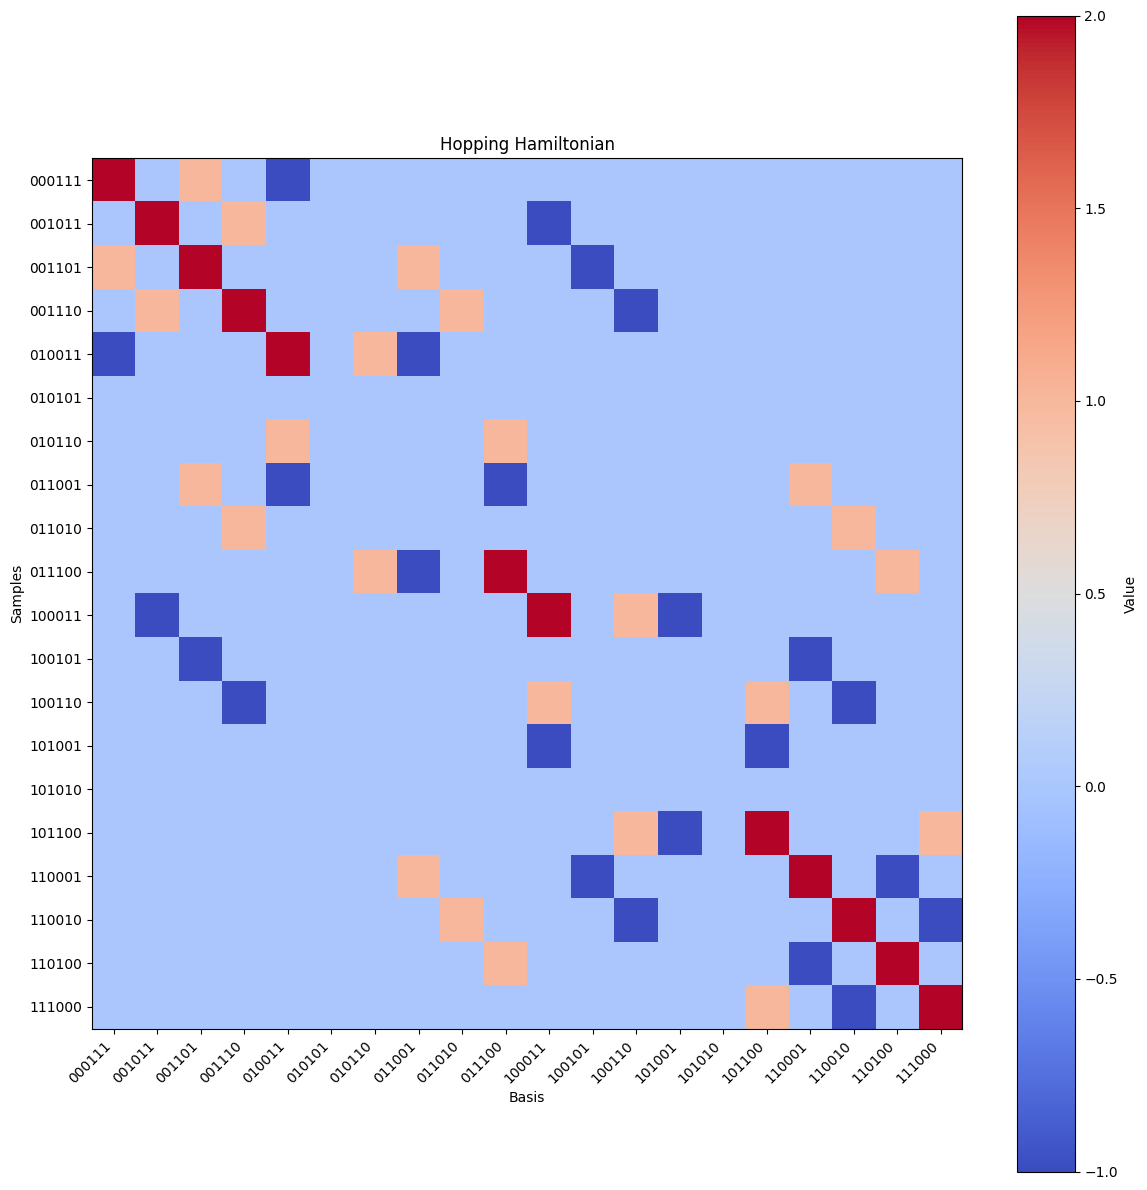

In [ ]:
P_NUM = 4
N_SITES = 4
N_SPINS = 2
str1 = spin_occupation_site_basis(N_SITES, N_SPINS)
str1 = filter_particle_num(str1, P_NUM)
a = expand_str_chains(str1)
b = expand_str_chains(str1)  # (s b o sp)

h_a_b = h.entry(a, b)  # (b_a, b_b)

display_heatmap(
    h_a_b,
    y_labels=str1,
    x_labels=str1,
    title="Hopping Hamiltonian",
    y_name="Samples",
    x_name="Basis",
)

In [10]:
h_a_b_np = h_a_b.detach().numpy()

In [11]:
from scipy.linalg import eigh

eigenvalues, eigenvectors = eigh(h_a_b_np)

print("Eigenvalues:")
print(eigenvalues)

Eigenvalues:
[-1.8200893e+00 -1.8200870e+00 -7.3205042e-01 -7.3205024e-01
 -7.7454706e-07 -4.7430444e-07  1.3663558e-07  7.3156889e-07
  5.8578563e-01  5.8578682e-01  1.5406370e+00  1.5406375e+00
  1.9999988e+00  2.0000007e+00  2.7320504e+00  2.7320511e+00
  3.4142137e+00  3.4142139e+00  4.2794523e+00  4.2794552e+00]


In [12]:
strs = it.product(enumerate(str1), enumerate(str1))

for (a, one_string), (b, another_string) in strs:
    print(f"one_string: {one_string}, another_string: {another_string}")
    entry = h_a_b[a, b]
    print(f"entry: {entry}")
    print()

one_string: 000111, another_string: 000111
entry: 2.0

one_string: 000111, another_string: 001011
entry: 0.0

one_string: 000111, another_string: 001101
entry: 1.0

one_string: 000111, another_string: 001110
entry: 0.0

one_string: 000111, another_string: 010011
entry: -1.0

one_string: 000111, another_string: 010101
entry: 0.0

one_string: 000111, another_string: 010110
entry: 0.0

one_string: 000111, another_string: 011001
entry: 0.0

one_string: 000111, another_string: 011010
entry: 0.0

one_string: 000111, another_string: 011100
entry: 0.0

one_string: 000111, another_string: 100011
entry: 0.0

one_string: 000111, another_string: 100101
entry: 0.0

one_string: 000111, another_string: 100110
entry: 0.0

one_string: 000111, another_string: 101001
entry: 0.0

one_string: 000111, another_string: 101010
entry: 0.0

one_string: 000111, another_string: 101100
entry: 0.0

one_string: 000111, another_string: 110001
entry: 0.0

one_string: 000111, another_string: 110010
entry: 0.0

one_strin